# Linear Regression using Multiple Features

charges = w1 * age + w2 * bmi + b

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
medical_df = pd.read_csv("insurance.csv")

In [13]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

In [15]:
inputs, targets = non_smoker_df[['age','bmi']] , non_smoker_df['charges']

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression().fit(inputs,targets)

In [21]:
predictions = model.predict(inputs)

In [22]:
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862], shape=(1064,))

In [25]:
model.coef_

array([266.87657817,   7.07547666])

In [26]:
model.intercept_

np.float64(-2293.6320906488727)

In [31]:
def  rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [34]:
rmse(targets,predictions)

np.float64(4662.3128354612945)

# Using Categrorical Features for machine learning

So far we have been using only numerical columns
since we can only perform computations with number if we could use categorical columns like smokers we can train single model for the entire dataset

to convert categorical columns we simply need to convert them into number

method 1 : if a category have two values (its called binary category)  then we can  replace their values with 0 and 1



method 2: if a category column has more than 2 category we can perform on hot encoding i.e create a new column for each category with 1,0s

method 3 : if the categores have natural order (e, cold , neutral , warm , hot_ then they can be canverted to numbres preserving the order. these are called ordinals

# Binary Categories

the smoker category just have two values yes or no

<Axes: xlabel='smoker', ylabel='charges'>

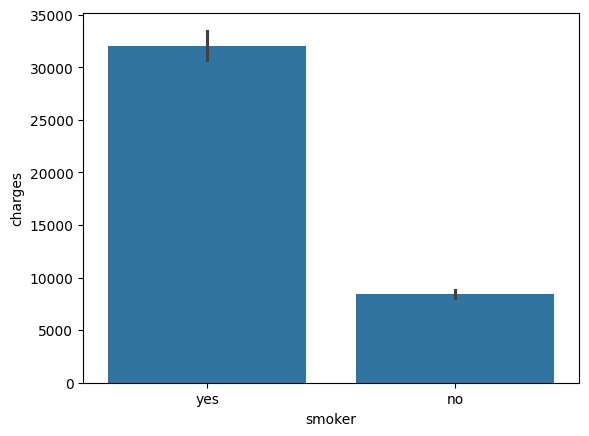

In [39]:
sns.barplot(data=medical_df,x = "smoker", y = "charges")
# barplot tells us about the average
# since the average is too high cause of outliners

In [40]:
smokers_code = {"no" : 0, "yes":1}
medical_df["smoker_code"] = medical_df.smoker.map(smokers_code)

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


Text(0.5, 1.0, 'Correlation Matrix')

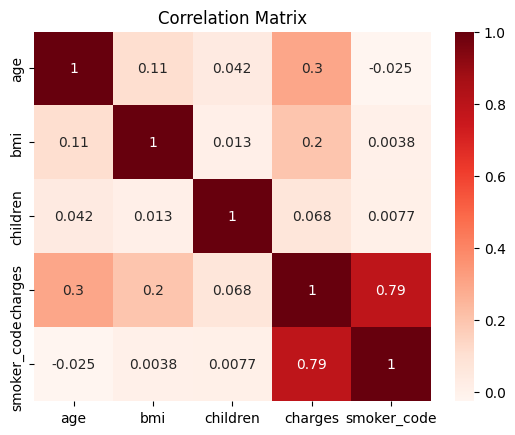

In [45]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

the correlation is high between charges and smoker

lets do this again with sex column too!

In [49]:
sex_code = {"female":0,"male":1}
medical_df["sex_code"] = medical_df.sex.map(sex_code)

Text(0.5, 1.0, 'Correlation Matrix')

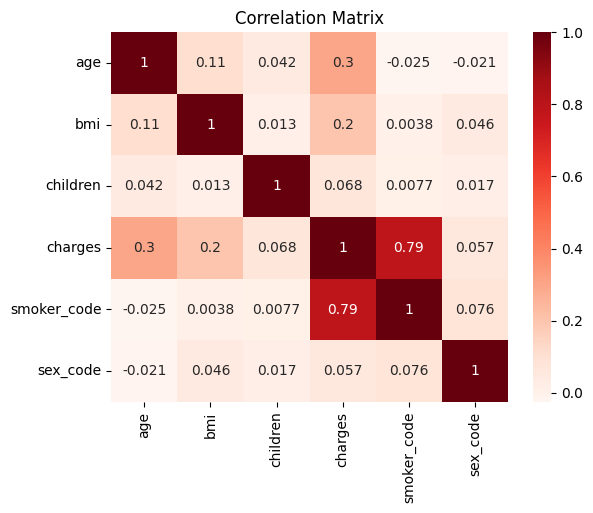

In [50]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

## now for region column it have 4 values for that we need to use One hot encoding

<Axes: xlabel='region', ylabel='charges'>

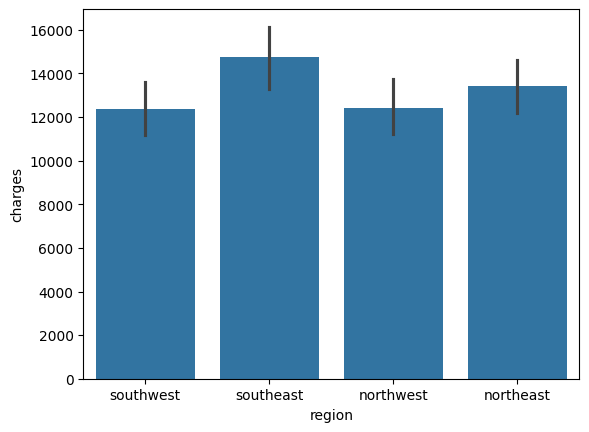

In [57]:
sns.barplot(data=medical_df, x = "region",y = "charges")

In [59]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [61]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [63]:
medical_df[["northeast","northwest","southeast","southwest"]] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Correlation Matrix')

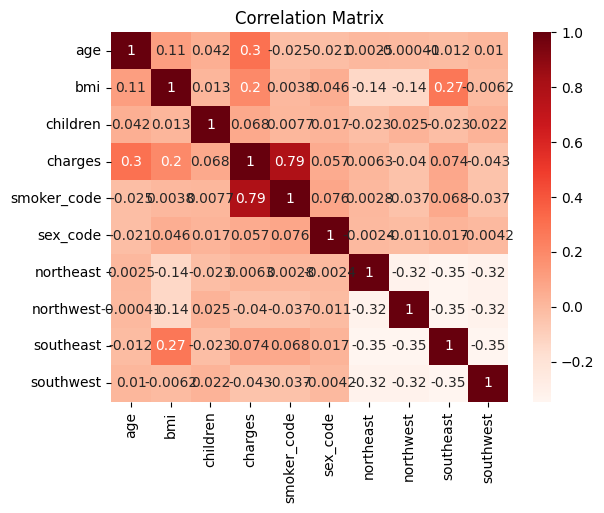

In [69]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds",annot=True)
plt.title("Correlation Matrix")

# Model Improvements

feature scalling